In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.weightstats as sms
from scipy.stats import t
import math


In [3]:
df = pd.read_csv("Downloads/Capstone Project/India.csv")
print(df)

           date   confirmed  vaccines  people_vaccinated  \
0    22-01-2020         NaN       0.0                NaN   
1    23-01-2020         NaN       0.0                NaN   
2    24-01-2020         NaN       0.0                NaN   
3    25-01-2020         NaN       0.0                NaN   
4    26-01-2020         NaN       0.0                NaN   
..          ...         ...       ...                ...   
774  06-03-2022  42967315.0       0.0        967279389.0   
775  07-03-2022  42971308.0       0.0        967460932.0   
776  08-03-2022  42975883.0       0.0        967725805.0   
777  09-03-2022  42980067.0       0.0        967946798.0   
778  10-03-2022  42984261.0       0.0                NaN   

     people_fully_vaccinated  school_closing  workplace_closing  \
0                        NaN             0.0                0.0   
1                        NaN             0.0                0.0   
2                        NaN             0.0                0.0   
3          

In [4]:
print(df.shape)

(779, 16)


In [5]:
df.head()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0


In [6]:
df.ffill(inplace=True)
df.bfill(inplace=True)

In [7]:
df.head()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,1.0,0.0,0.0,7668.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0


In [8]:
print(df)

           date   confirmed  vaccines  people_vaccinated  \
0    22-01-2020         1.0       0.0                0.0   
1    23-01-2020         1.0       0.0                0.0   
2    24-01-2020         1.0       0.0                0.0   
3    25-01-2020         1.0       0.0                0.0   
4    26-01-2020         1.0       0.0                0.0   
..          ...         ...       ...                ...   
774  06-03-2022  42967315.0       0.0        967279389.0   
775  07-03-2022  42971308.0       0.0        967460932.0   
776  08-03-2022  42975883.0       0.0        967725805.0   
777  09-03-2022  42980067.0       0.0        967946798.0   
778  10-03-2022  42984261.0       0.0        967946798.0   

     people_fully_vaccinated  school_closing  workplace_closing  \
0                     7668.0             0.0                0.0   
1                     7668.0             0.0                0.0   
2                     7668.0             0.0                0.0   
3          

In [9]:
df.describe()

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,7.790000e+02,779.0,7.790000e+02,7.790000e+02,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.680317e+07,0.0,2.438694e+08,1.303690e+08,-0.885751,-1.804878,-0.499358,-2.798460,-0.699615,-1.580231,-0.919127,2.949936,1.940950,1.427471,0.451861
std,1.473802e+07,0.0,3.377858e+08,2.272750e+08,2.424922,1.451150,1.814236,2.136522,1.335548,1.674601,1.511696,0.873082,0.251688,0.505309,3.634126
min,1.000000e+00,0.0,0.000000e+00,7.668000e+03,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-4.000000
25%,1.882000e+06,0.0,0.000000e+00,7.668000e+03,-3.000000,-3.000000,-2.000000,-4.000000,-2.000000,-3.000000,-2.000000,2.000000,2.000000,1.000000,-4.000000
50%,1.091659e+07,0.0,8.044786e+06,7.668000e+03,-2.000000,-2.000000,-2.000000,-4.000000,0.000000,-2.000000,-2.000000,3.000000,2.000000,1.000000,2.000000
75%,3.267249e+07,0.0,4.797859e+08,1.409168e+08,3.000000,-2.000000,2.000000,-2.000000,0.000000,-2.000000,0.000000,4.000000,2.000000,2.000000,4.000000
max,4.298426e+07,0.0,9.679468e+08,8.058866e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000


In [10]:
print(df.dtypes)

date                                    object
confirmed                              float64
vaccines                               float64
people_vaccinated                      float64
people_fully_vaccinated                float64
school_closing                         float64
workplace_closing                      float64
cancel_events                          float64
gatherings_restrictions                float64
transport_closing                      float64
stay_home_restrictions                 float64
internal_movement_restrictions         float64
international_movement_restrictions    float64
information_campaigns                  float64
contact_tracing                        float64
facial_coverings                       float64
dtype: object


In [11]:
print(df.isna().sum())

date                                   0
confirmed                              0
vaccines                               0
people_vaccinated                      0
people_fully_vaccinated                0
school_closing                         0
workplace_closing                      0
cancel_events                          0
gatherings_restrictions                0
transport_closing                      0
stay_home_restrictions                 0
internal_movement_restrictions         0
international_movement_restrictions    0
information_campaigns                  0
contact_tracing                        0
facial_coverings                       0
dtype: int64


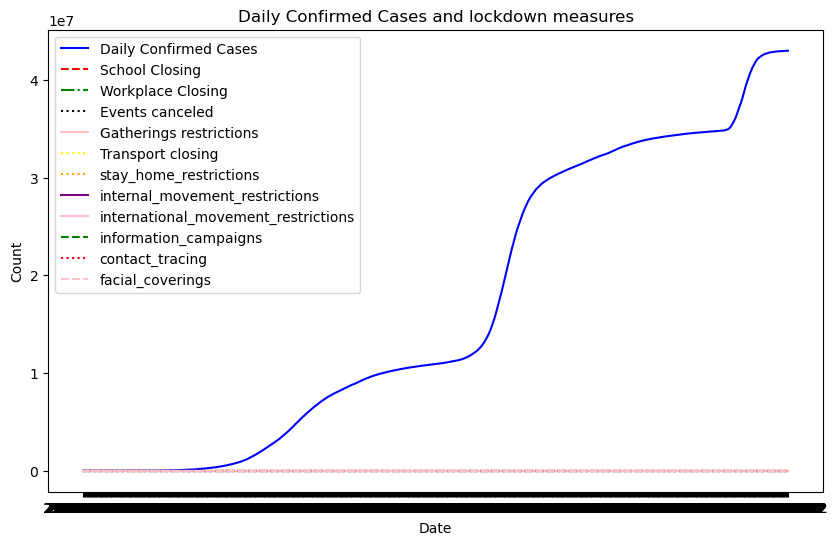

In [19]:

# Plotting confirmed cases and school closing measure as an example
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['confirmed'], label='Daily Confirmed Cases', color='blue')
plt.plot(df['date'], df['school_closing'], label='School Closing', color='red', linestyle='--')
plt.plot(df['date'], df['workplace_closing'], label='Workplace Closing', color='green', linestyle='-.')
plt.plot(df['date'], df['cancel_events'], label='Events canceled', color='black', linestyle='dotted')
plt.plot(df['date'], df['gatherings_restrictions'], label='Gatherings restrictions', color='pink', linestyle='solid')
plt.plot(df['date'], df['transport_closing'], label='Transport closing', color='yellow', linestyle='dotted')
plt.plot(df['date'], df['stay_home_restrictions'], label='stay_home_restrictions', color='orange', linestyle=':')
plt.plot(df['date'], df['internal_movement_restrictions'], label='internal_movement_restrictions', color='purple', linestyle='-')
plt.plot(df['date'], df['international_movement_restrictions'], label='international_movement_restrictions', color='pink', linestyle='solid')
plt.plot(df['date'], df['information_campaigns'], label='information_campaigns', color='green', linestyle='--')
plt.plot(df['date'], df['contact_tracing'], label='contact_tracing', color='red', linestyle='dotted')
plt.plot(df['date'], df['facial_coverings'], label='facial_coverings', color='pink', linestyle='--')


plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Confirmed Cases and lockdown measures')
plt.legend()
plt.show()




In [ ]:
bu this plots got know the relation between date & other lock down measures

In [28]:
# Descriptive statistics for confirmed cases and lockdown measures
lockdown_columns = ['school_closing', 'workplace_closing', 'cancel_events', 'gatherings_restrictions',
                    'transport_closing', 'stay_home_restrictions', 'internal_movement_restrictions',
                    'international_movement_restrictions', 'facial_coverings']

# Summary statistics
print("Descriptive Statistics for Lockdown Measures and Confirmed Cases")
print(df[lockdown_columns + ['confirmed']].describe())

# Frequency distribution for school_closing levels
school_closing_dist = df['school_closing'].value_counts()
print("\nFrequency Distribution for School Closing:")
print(school_closing_dist)


Descriptive Statistics for Lockdown Measures and Confirmed Cases
       school_closing  workplace_closing  cancel_events  \
count      779.000000         779.000000     779.000000   
mean        -0.885751          -1.804878      -0.499358   
std          2.424922           1.451150       1.814236   
min         -3.000000          -3.000000      -2.000000   
25%         -3.000000          -3.000000      -2.000000   
50%         -2.000000          -2.000000      -2.000000   
75%          3.000000          -2.000000       2.000000   
max          3.000000           3.000000       2.000000   

       gatherings_restrictions  transport_closing  stay_home_restrictions  \
count               779.000000         779.000000              779.000000   
mean                 -2.798460          -0.699615               -1.580231   
std                   2.136522           1.335548                1.674601   
min                  -4.000000          -2.000000               -3.000000   
25%               

In [ ]:
by this descriptive staticts got an idea of analysis on each lockdown measures like how much confirmed case are present in overall 

In [32]:
from scipy.stats import ttest_ind

# Group data by school closing levels
school_closed = df[df['school_closing'] >= 3]['confirmed']
school_open = df[df['school_closing'] < 3]['confirmed']

# Perform independent t-test
t_stat, p_value = ttest_ind(school_closed, school_open, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")




T-statistic: -17.076252744041227, P-value: 9.359553806869393e-56


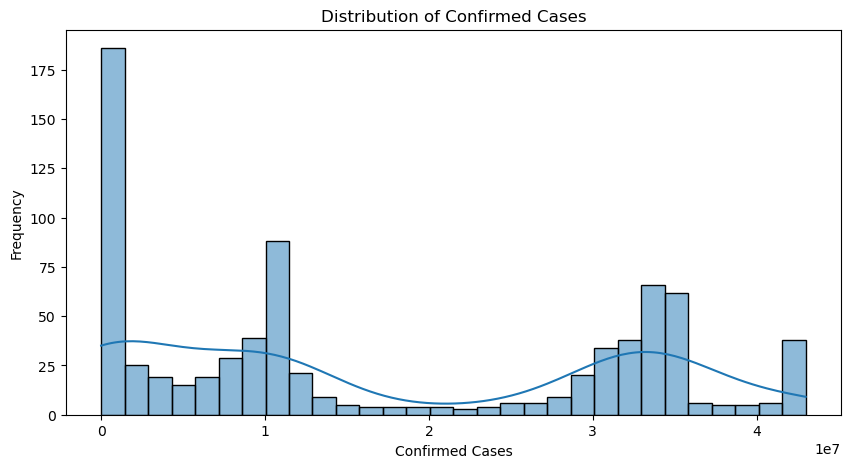

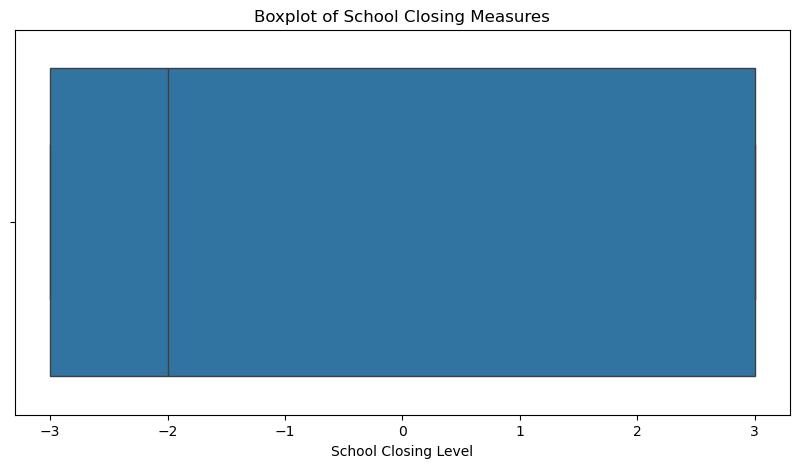

count    7.790000e+02
mean     1.680317e+07
std      1.473802e+07
min      1.000000e+00
25%      1.882000e+06
50%      1.091659e+07
75%      3.267249e+07
max      4.298426e+07
Name: confirmed, dtype: float64


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis for 'confirmed' cases
plt.figure(figsize=(10, 5))
sns.histplot(df['confirmed'], bins=30, kde=True)
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.show()

# Boxplot for lockdown measures (example: school closing)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['school_closing'])
plt.title('Boxplot of School Closing Measures')
plt.xlabel('School Closing Level')
plt.show()

# Descriptive Statistics for Confirmed Cases
print(df['confirmed'].describe())


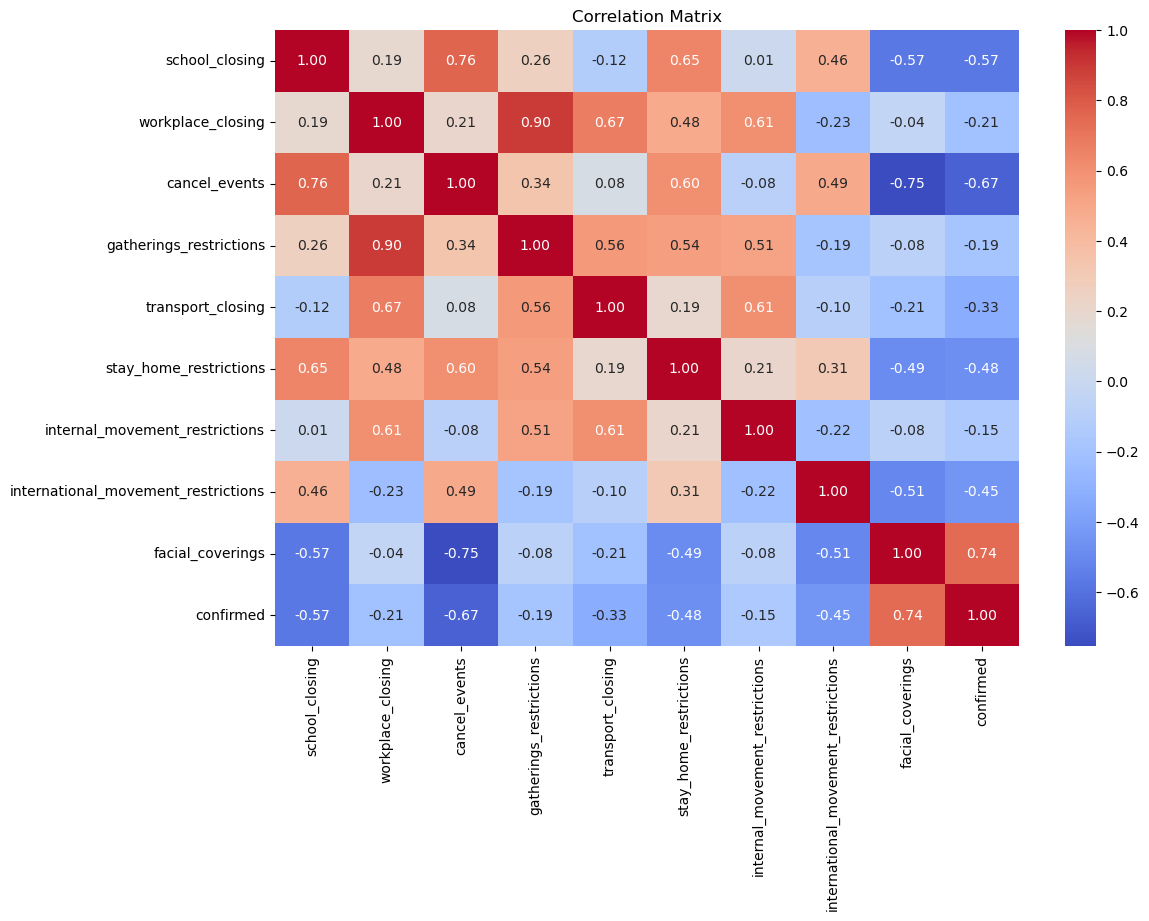

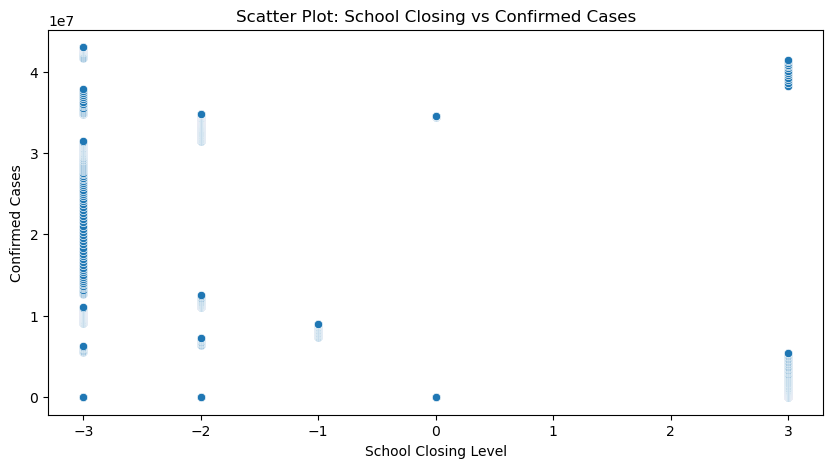

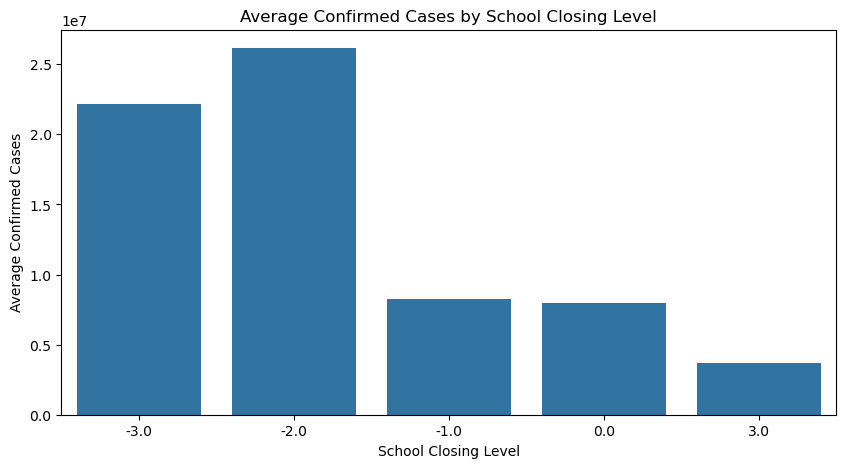

In [31]:
# Bivariate Analysis - Correlation Matrix
correlation_matrix = df[lockdown_columns + ['confirmed']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot between Confirmed Cases and School Closing
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['school_closing'], y=df['confirmed'])
plt.title('Scatter Plot: School Closing vs Confirmed Cases')
plt.xlabel('School Closing Level')
plt.ylabel('Confirmed Cases')
plt.show()

# Grouped Bar Chart for Average Confirmed Cases by School Closing Level
avg_cases_by_school_closing = df.groupby('school_closing')['confirmed'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='school_closing', y='confirmed', data=avg_cases_by_school_closing)
plt.title('Average Confirmed Cases by School Closing Level')
plt.xlabel('School Closing Level')
plt.ylabel('Average Confirmed Cases')
plt.show()
